# Model Validation Methods

**Cross-validation**
Cross-validation or ‘k-fold cross-validation’ is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

if you two or three model  to implement and which one dont know to check best model so that time **cross validation** is really helpful and another thing why cross validation you need is when you shuffle the data in hold out method the accuracay always changes to prevent that also we need cross validation especially in train test split as we input the random state 

#### **1.Evaluate using KFold Cross Validation**

In [12]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']


dataframe = read_csv('https://raw.githubusercontent.com/omgo101/dataset-/main/pima-indians-diabetes.data%20(1).csv', names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# num_folds means 10 equal records will created for test and remaining for train 
num_folds = 10
# Seeds allow you to create a starting point for randomly generated numbers, so that each time your code is run the same answer is generated.
seed = 7

kfold = KFold(n_splits=num_folds, random_state=None)
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=kfold)


In [13]:
results

array([0.68831169, 0.81818182, 0.76623377, 0.68831169, 0.77922078,
       0.79220779, 0.84415584, 0.83116883, 0.75      , 0.80263158])

In [14]:
results.mean()*100.0

77.60423786739577

In [15]:
results

array([0.68831169, 0.81818182, 0.76623377, 0.68831169, 0.77922078,
       0.79220779, 0.84415584, 0.83116883, 0.75      , 0.80263158])

In [16]:
results.std()*100.0

5.157545262086822

**2.STRATIFIED K FOLD CROSS VALIDATION**

The stratified k fold cross-validation is an extension of the cross-validation technique used for **classification problems**. It maintains the same class **ratio** throughout the K folds as the ratio in the original dataset.
The folds are made by **preserving the percentage** of samples for each class.

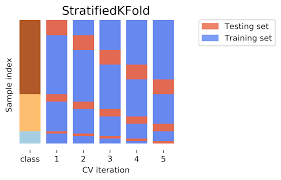

In [17]:
from  sklearn.model_selection import  StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
accuracy =[]
model=LogisticRegression()
skf=StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
#get_n_splits ([X, y, groups]) Returns the number of splitting iterations in the cross-validator. split (X[, y, groups]) Generate indices to split data into training and test set
skf.get_n_splits(X,Y)
for train_index, test_index in skf.split(X,Y): 
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   Y_train, Y_test = Y[train_index], Y[test_index]
    
   model.fit(X_train,Y_train)
   prediction= model.predict(X_test)
   score=accuracy_score(prediction,Y_test)
   #append means add 
   accuracy.append(score)
   print(accuracy)



TRAIN: [154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369
 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387
 388 389 390 391 392 393 394 395 396 397 398

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


#### **3.Evaluate using Leave One Out Cross Validation**

In [18]:
# Evaluate using Leave One Out Cross Validation
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
loocv = LeaveOneOut()
model = LogisticRegression(max_iter=300)
results = cross_val_score(model, X, Y, cv=loocv)


In [19]:
results.mean()*100.0

77.60416666666666

In [20]:
results.std()*100.0

41.68944689773287

In [21]:
results

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1.

#### **4.Leave-p-out cross-validation**
Leave p-out cross-validation (LpOCV) is an exhaustive cross-validation technique, that involves using p-observation as validation data, and remaining data is used to train the model. 

In [22]:
from sklearn.model_selection import LeavePOut

In [23]:
# creating design matrix X and target vector y
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [24]:
leaveout = LeavePOut(1) # taking p=1
leaveout.get_n_splits(X) # Number of splits of X

768

In [25]:
# Printing the Train & Test Indices of splits
for train_index, test_index in leaveout.split(X): 
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   Y_train, Y_test = Y[train_index], Y[test_index]


Streaming output truncated to the last 5000 lines.
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629
 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647
 648 649 650 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666
 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684
 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702
 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720
 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738
 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756
 757 758 759 760 761 762 763 764 765 766 767] TEST: [651]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19

but for time series data ?
we will use 
**GapLeavePOut**

#### **5.GapLeavePOut**

In [26]:
pip install tscv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from tscv import GapLeavePOut
cv = GapLeavePOut(p=3, gap_before=1, gap_after=2)
for train, test in cv.split(range(7)):
 print("train:", train, "test:", test)

train: [5 6] test: [0 1 2]
train: [6] test: [1 2 3]
train: [0] test: [2 3 4]
train: [0 1] test: [3 4 5]
train: [0 1 2] test: [4 5 6]


/usr/local/lib/python3.7/dist-packages/tscv/_split.py:268: Warning: Too few samples. Some training set is a singleton.
  warnings.warn(SINGLETON_WARNING, Warning)


[documentation](https://tscv.readthedocs.io/en/latest/tutorial/leave_p_out.html#:~:text=The%20cross%2Dvalidation%20known%20as,n%20p%20different%20test%20sets.) 

# **6.(1)1Hold-out cross validation**

To take out good accuracy and less error rate 



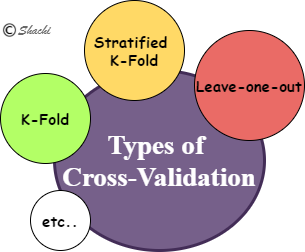

Hold out method means holding the training data and out the test data for testing 


but there are disadvantages in hold out method also is the spliting of the data is completely random so some class may come in training and some did not in test and second is interdependence of train  and test data (overpresentation and underpresentation of data)

**but why hold out method instead of cross validation**

The hold-out method is good to use when you have a very large dataset, you’re on a time crunch, or you are starting to build an initial model in your data science project. Keep in mind that because cross-validation uses multiple train-test splits, it takes more computational power and time to run than using the holdout method.

#### 2.Evaluate using a train and a test set
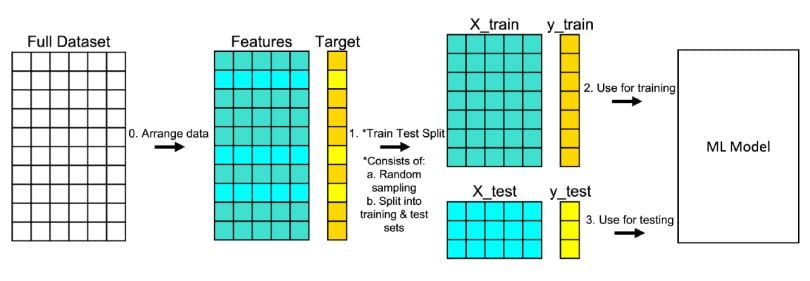

#### Typically, different validation strategies exist based on the number of splits being done in the dataset.

## Train/Test split or Holdout Validation.

In this strategy, we simply split the data into two sets in a way that our observations do not overlap between train and test set do not overlap. That is the reason why **it is important not to have duplicated samples in our dataset**.


For simple hold-out validation testing, data is split into two groups i.e. Training set and Testing set as shown below


Python's Scikit-Learn library' offers handy data splitting methods out of the box. 
> **sklearn.model_selection.train_test_split(*arrays, **options)**

[Click Here to visit the official documentation for this method.](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Here is how you would run it . We will first generate some sample data to represent our X and y variables, and see how the split is applied to the data. 

In [28]:
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']


dataframe = read_csv('https://raw.githubusercontent.com/omgo101/dataset-/main/pima-indians-diabetes.data%20(1).csv', names=names)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]
# We can now apply the split using the method shown earlier. For this example we will do a 70/30 split by specifying test_size=0.3 which means we are allocating 30% of the data to our test set.
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

model = LogisticRegression(max_iter=400)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)


In [29]:
dataframe 


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
result*100.0

78.74015748031496

# **7.Shuffle split**
Repeated random subsampling validation also referred to as Monte Carlo cross-validation splits the dataset randomly into training and validation. Unlikely k-fold cross-validation split of the dataset into not in groups or folds but splits in this case in random

In [31]:
import numpy as np
from sklearn.model_selection import ShuffleSplit

In [32]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
rs.get_n_splits(X)

5

In [33]:
print(rs)
ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)
for train_index, test_index in rs.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)
TRAIN: [1 3 0 4] TEST: [5 2]
TRAIN: [4 0 2 5] TEST: [1 3]
TRAIN: [1 2 4 0] TEST: [3 5]
TRAIN: [3 4 1 0] TEST: [5 2]
TRAIN: [3 5 1 0] TEST: [2 4]


In [34]:
rs = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.25,random_state=0)
for train_index, test_index in rs.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 0] TEST: [5 2]
TRAIN: [4 0 2] TEST: [1 3]
TRAIN: [1 2 4] TEST: [3 5]
TRAIN: [3 4 1] TEST: [5 2]
TRAIN: [3 5 1] TEST: [2 4]


# **8.Rolling cross validation**
The method that can be used for cross-validating the time-series model is cross-validation on a rolling basis. Start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted.
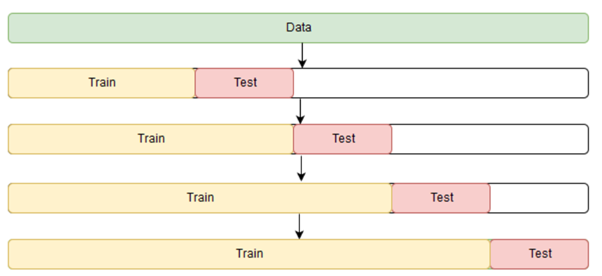

In [35]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train_index, test_index in tscv.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


**there are more two cross validation for time series data**

*Time Series Split Cross-Validation* and *Blocked Cross-Validation*

####  **9.Time Series Split Cross-Validation**
Consider we have a data of student’s performance for one year(January to December)


The idea for time series splits is to divide the training set into two folds at each iteration on condition that the validation set is always ahead of the training set. At the first iteration, one trains the candidate model on the student performance from January to March and validates on April’s data, and for the next iteration, train on data from January to April, and validate on May’s data, and so on to the end of the training set. This way dependence is respected



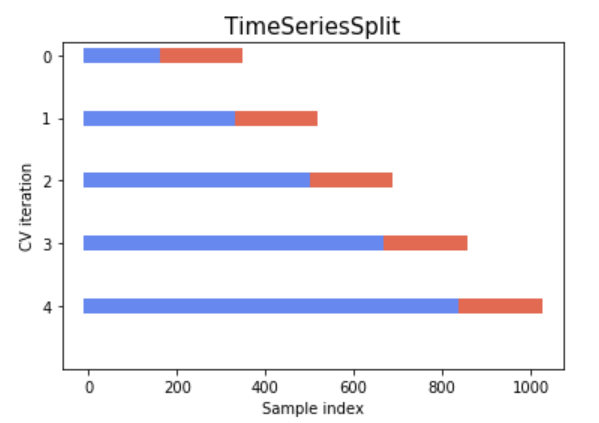

In [36]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
for train_index, test_index in tscv.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]



TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [37]:
# Fix test_size to 2 with 12 samples
X = np.random.randn(12, 2)
y = np.random.randint(0, 2, 12)
tscv = TimeSeriesSplit(n_splits=3, test_size=2)
for train_index, test_index in tscv.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]


TRAIN: [0 1 2 3 4 5] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11]


In [38]:
# Add in a 2 period gap
tscv = TimeSeriesSplit(n_splits=3, test_size=2, gap=2)
for train_index, test_index in tscv.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 1 2 3] TEST: [6 7]
TRAIN: [0 1 2 3 4 5] TEST: [8 9]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [10 11]


#### **10.Blocked Cross-Validation**

The model will observe future patterns to forecast and try to memorize them. That’s why blocked cross-validation was introduced. It works by adding margins at two positions. The first is between the training and validation folds in order to prevent the model from observing lag values which are used twice, once as a regressor and another as a response. The second is between the folds used at each iteration in order to prevent the model from memorizing patterns from an iteration to the next.
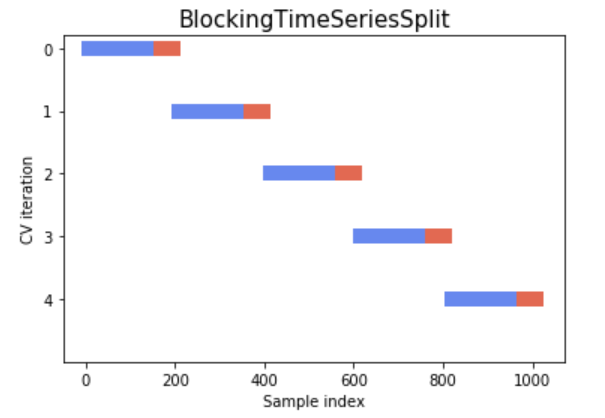

sklearn.model_selection.KFold does not shuffle by default. As long as it is not shuffling, you could use it for time-series, and it is the same as the 'blocked cross-validation' mentioned in the paper. If you set shuffle=True then it would be the same as the k-fold splitting the authors describe. (ShuffleSplit is a bit different because each fold is random, so records can appear in multiple folds.)